Text(0.6, 0.6, 'local max')

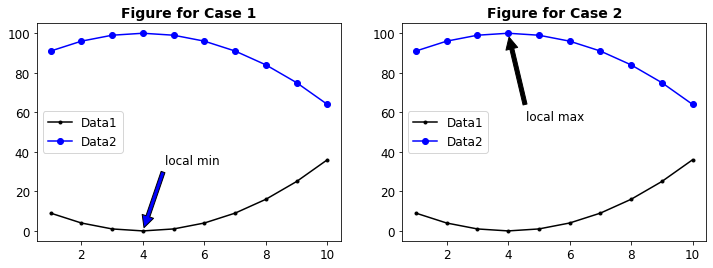

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


font = {
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # title size


A=np.array([1,2,3,4,5,6,7,8,9,10])
B=np.square(A-4)
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.title("Figure for Case 1",fontsize=14,fontweight='bold')
p1=plt.plot(A,B,'k.-',label="Data1")
p2=plt.plot(A,100-B,'bo-',label="Data2")
plt.legend(loc='center left')
plt.annotate('local min', xy=(4, 0),  xycoords='data',
            xytext=(0.6, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='blue', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )


plt.subplot(122)
plt.title("Figure for Case 2",fontsize=14,fontweight='bold')
p1=plt.plot(A,B,'k.-',label="Data1")
p2=plt.plot(A,100-B,'bo-',label="Data2")
plt.legend(loc='center left')
plt.annotate('local max', xy=(4, 100),  xycoords='data',
            xytext=(0.6, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

<class 'numpy.ndarray'>


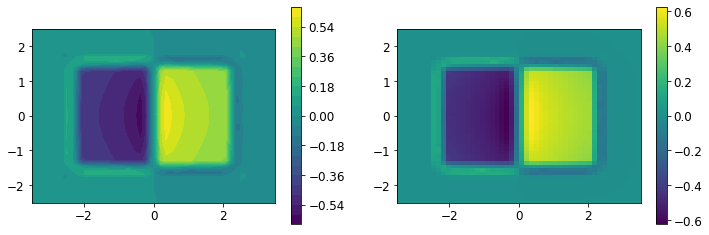

In [3]:
from scipy.interpolate import griddata
DataB=np.loadtxt('B.txt',delimiter=None,skiprows=9,max_rows=None)
print(type(DataB))
Xmax=max(DataB[:,0])
Ymax=max(DataB[:,1])

x=np.linspace(-Xmax,Xmax,50)
y=np.linspace(-Ymax,Ymax,50)

X,Y=np.meshgrid(x,y)
Z=griddata((DataB[:,0],DataB[:,1]),DataB[:,2],(X,Y),method='linear')

Z=np.array(Z)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
co=plt.contourf(X,Y,Z,20)
plt.axis('scaled')
plt.colorbar()

plt.subplot(1,2,2)
im=plt.imshow(Z,extent=[-Xmax, Xmax, -Ymax, Ymax])
plt.axis('scaled')
plt.colorbar()

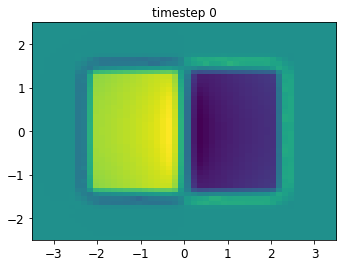

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig,ax=plt.subplots()

im=ax.imshow(Z,extent=[-Xmax, Xmax, -Ymax, Ymax])

def animate(i):
    label = 'timestep {0}'.format(i)
    im.set_data(Z*(i-10)/10)
    ax.set_title(label)
    return im,ax

ani = FuncAnimation(fig, animate, interval=200, save_count=20,repeat=True)
ani.save('B.gif', dpi=80, writer='imagemagick')

plt.show()



<IPython.core.display.Javascript object>


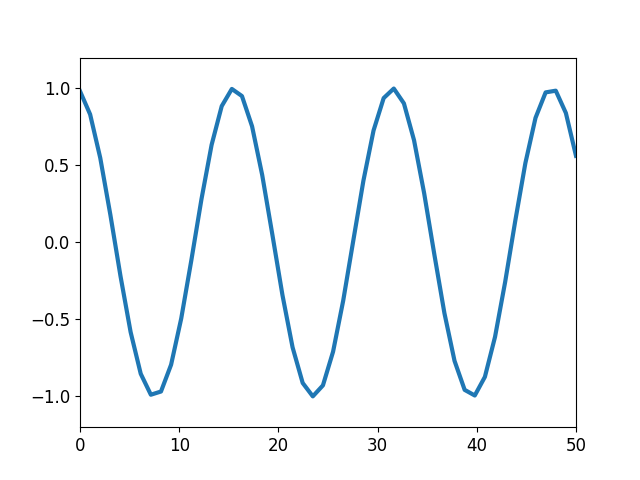

In [10]:
%matplotlib notebook
fig=plt.figure()
ax=plt.axes(xlim =(0, 50), ylim =(-1.2, 1.2))

t=np.linspace(0,50)
S=np.sin(t/16.0*2*np.pi);

line, = ax.plot(t, S, lw = 3)  

def init():  
    line.set_data([], []) 
    return line, 

def animate(i): 
    t=np.linspace(0,50)
    S=np.sin(2*np.pi*(t/16+0.02*i))
    line.set_data(t,S)
    return line,

ani= FuncAnimation(fig, animate, init_func = init, frames = 50, interval = 20, blit = True) 


ani.save('Sine.gif', dpi=80, writer='imagemagick')

plt.show()
    
    
    
    


<IPython.core.display.Javascript object>


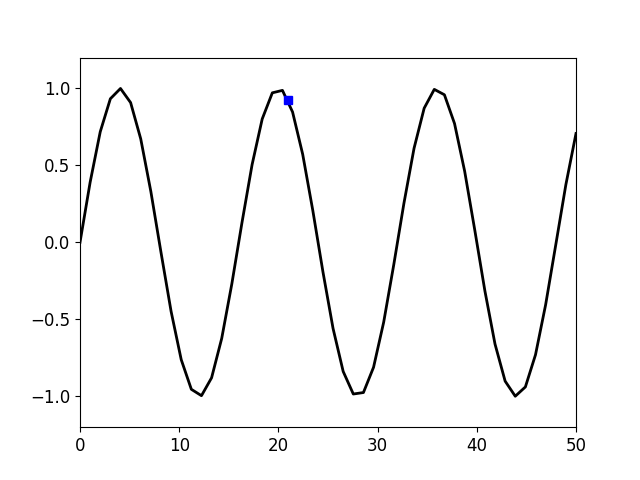

In [12]:

fig=plt.figure()
ax=plt.axes(xlim =(0, 50), ylim =(-1.2, 1.2))

t=np.linspace(0,50)
S=np.sin(t/16.0*2*np.pi)

ax.plot(t,S,'k-',lw=2)
line, = ax.plot([],[],'bs', lw = 5)  


def init():  
    line.set_data([], []) 
    return line, 

def animate(i): 
    
    line.set_data(i,np.sin(i/16.0*2*np.pi))
    return line,

ani= FuncAnimation(fig, animate, init_func = init, frames = 50, interval = 50, blit = True) 


ani.save('Point.gif', dpi=80, writer='imagemagick')

plt.show()
    
    
    
    


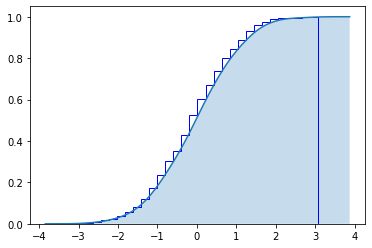

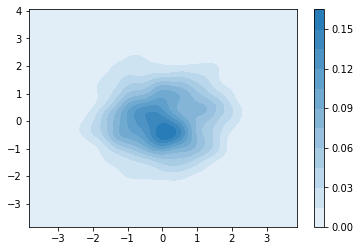

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A=np.random.randn(1000)

B=np.random.randn(1000)

#C=np.random.randn(1,1000)

#D=np.zeros(shape=[3,1000])

#D[0,:]=A
#D[1,:]=B
#D[2,:]=C

plt.hist(A,bins=30,color='blue',density=True,cumulative=True,histtype='step')
sns.kdeplot(A,cumulative=True,shade=True)

#sns.distplot(A,hist=True, kde=True, bins=30, color = 'blue', hist_kws={'edgecolor':'black','cumulative':True},kde_kws={'linewidth': 2,'cumulative':True})

plt.figure()
sns.kdeplot(A,B,shade=True,cbar=True)


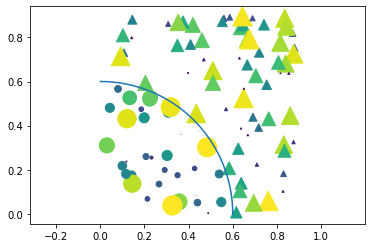

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)

area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)

r = np.sqrt(x ** 2 + y ** 2)

area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))
plt.axis('equal')
plt.show()

In [11]:
print(x)

[0.63033057 0.66847573 0.63835201 0.51007097 0.8800068  0.63570136
 0.22312418 0.14209502 0.62792867 0.647961   0.23196999 0.3073921
 0.87188505 0.62505639 0.41974493 0.63253143 0.46060729 0.83586723
 0.66579237 0.56019513 0.58639092 0.35712685 0.48891546 0.71990958
 0.64939025 0.26582758 0.14485129 0.18551296 0.12089285 0.43254452
 0.30826963 0.32667236 0.87562587 0.09984925 0.34943768 0.70475929
 0.87560753 0.43488864 0.30277899 0.51067713 0.04314736 0.35004333
 0.81567328 0.14491639 0.66925902 0.56967675 0.29176202 0.83013888
 0.21350379 0.74155101 0.67554643 0.10240601 0.76082512 0.83153892
 0.19875311 0.83974849 0.44009887 0.42724678 0.08025072 0.20695336
 0.64434367 0.44651355 0.68984044 0.80711759 0.69500072 0.83445686
 0.55318682 0.54815739 0.61621638 0.22591167 0.75405387 0.10675406
 0.71751127 0.85410384 0.13325659 0.81618479 0.70953599 0.69156526
 0.53864683 0.39793106 0.65073422 0.37495642 0.20412936 0.40880461
 0.76314938 0.84299035 0.86043257 0.35288488 0.6374922  0.11656